# Eulers metode

```{admonition} Læringsutbytte
:class: utbytte, dropdown
I dette temaet arbeider vi med kompetansemålet:
 * analysere og tolke ulike funksjoner ved å bruke derivasjon
 * modellere og analysere eksponentiell og logistisk vekst i reelle datasett

Etter å ha arbeidet med temaet, skal du:
 * få dypere innsikt i modellene for lineær, eksponentiell og logistisk vekst
 * bruke Eulers metode for å utforske forskjellige typer vekst
 * undersøke vekst knyttet til naturvitenskapelige fenomener
```

## Vekst
På forrige side så vi på ulike modeller for vekst. Vi så at vi for de ulike vekstmodellene hadde generelle uttrykk for den deriverte.

**Konstant vekst:** $f'(x)=a$

**Eksponentiell vekst:** $f'(x)=k\cdot f(x)$

**Logistisk vekst:** $\displaystyle f'(x)=k\cdot f(x)\cdot \left(1-\frac{f(x)}{B}\right)$

Disse sammenhengene er eksempler på noe som i matematikken kalles differensiallikninger. Det er likninger som har funksjoner som ukjente og som inneholder den deriverte av funksjonen. I R1 er det ikke noe mål om at dere skal lære å løse slike likninger, men vi skal se på en numerisk metode som kan gi oss løsninger på mange slike likninger. Veldig mange lover i naturvitenskapen er formulert som slike differensiallikninger der vi vet noe om sammenhengen mellom vekst av en størrelse ($f'(x)$) og selve størrelsen ($f(x)$).

## Konstant vekst

La oss ta den konstante veksten som eksempel. Fra definisjonen av den deriverte har vi at

$\displaystyle f'(x)=\lim_{\Delta x \to 0}\frac{f(x+\Delta x)-f(x)}{\Delta x} = a$

der den siste likheten gjelder kun for konstant vekst. Siden veksten er lik overalt kan vi her i prinsippet fjerne grenseverdien og si at

$\displaystyle a=\frac{f(x+\Delta x)-f(x)}{\Delta x}$

Denne sammenhengen kan vi skrive om til

$f(x+\Delta x) = f(x)+a\cdot \Delta x$

Fra dette punktet kan vi finne et nytt punkt, og så et nytt og så videre. Til sammen vil vi da ha punkter som vi kan trekke en linje gjennom. Dette vil gi grafen til funksjonen vi er ute etter å finne

For å bruke metoden trenger vi å vite en verdi for funksjonen $f(x_0)$. Dette kaller vi initialbetingelsen (eller startbetingelsen) og tilsvarer et punkt på grafen $(x_0, f(x_0))$. Fra dette punktet kan vi regne ut neste punkt ved

$f(x_1)=f(x_0+\Delta x) = f(x_0)+a\cdot \Delta x$ 

Neste punkt igjen blir

$f(x_2)=f(x_1+\Delta x)= f(x_1)+a\cdot \Delta x$

På denne måten finner vi mannge punkter på grafen og kan trekke en linje gjennom dem. Metoden er illustrert under.

```{figure} ./bilder/eulerkonstant.png
---
scale: 20%
---
```

Framgangsmåten baserer seg på mange at vi kan bruke en liten verdi for $\Delta x$ og finne mange punkt. Da er det naturlig å bruke programmering for å utføre metoden. Det gjør vi under og som forventet ser vi at vi får en lineær funksjon.


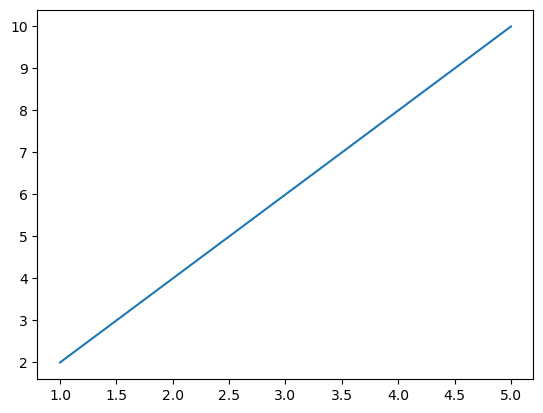

In [1]:
import matplotlib.pyplot as plt

x0 = 1                 # Startverdi for x
xs = 5                 # Sluttverdi for x
y0 = 2                 # Startverdi for y=f(x)
a = 2                  # Konstant vekst
dx = 0.1               # Steglengde

# Setter x og y lik startverdien
x = x0
y = y0

# Oppretter lister for x- og y-verdier
xverdier = []
yverdier = []

# Løkke der x økes steg for steg og y økes basert på den deriverte.
# Verdiene legges i lister som skal brukes til å tegne grafene.
while x <= xs:
    xverdier.append(x)
    yverdier.append(y)
    x = x + dx
    y = y + a*dx
    
plt.plot(xverdier, yverdier)
plt.show()


## Ikke-konstant vekst
De aller fleste vekstmodeller vil ikke ha konstant vekst. Metoden over kan imidlertid modifiseres slik at den også fungerer i slike tilfeller. Vi starter igjen med definisjonen for den deriverte.

$\displaystyle f'(x)=\lim_{\Delta x \to 0}\frac{f(x+\Delta x)-f(x)}{\Delta x}$

Dersom vi setter $\Delta x$ til et veldig lite tall kan vi fjerne grenseverdien og finne en tilnærmingsverdi for den deriverte slik vi gjorde det på siden om numerisk derivasjon.

$\displaystyle f'(x)\approx\frac{f(x+\Delta x)-f(x)}{\Delta x}$

Så skriver vi om uttrykket til

$\displaystyle f(x+\Delta x)\approx f(x)+f'(x)\cdot \Delta x$

Dersom vi har et startpunkt $(x_0, f(x_0))$ finner vi da den neste funksjonsverdien (og dermed neste punkt) ved

$\displaystyle f(x_1)=f(x_0+\Delta x)\approx f(x_0)+f'(x_0)\cdot \Delta x$

og så videre. Metoden kalles Eulers metode.

```{admonition} Eulers metode
:class: def
Vi kan finne tilnærmede funksjonsverdier $f(x_{n+1})$ ved å bruke funksjonsverdien $f(x_n)$ og den deriverte i punktet $f'(x_n)$ sammen med en liten steglengde $\Delta x$

$f(x_{n+1})=f(x_n)+f'(x_n)\cdot \Delta x$

```

Vi prøver metoden når vi har en derivert på formen $f'(x)=0.2\cdot f(x)$. Startpunktet setter vi til $(2, 4)$ og vi beregner verdier fram til $x=10$.

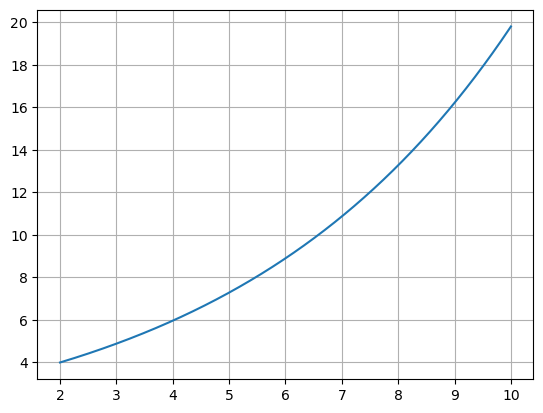

In [6]:
import matplotlib.pyplot as plt 
import numpy as numpy

x0 = 2           # Sett startverdi for x
y0 = 4           # Sett startverdi for y
xs = 10          # Setter sluttverdi for x
dx = 10**-6      # Sett steglengde

# Oppretter lister til å lagre x- og y-verdier
xliste = [x0]
yliste = [y0]

# Oppretter variabler for x og y som kan oppdateres i løkka
x = x0       
y = y0

# Definerer formen på den deriverte som kan avhenge av både x og y
def df(x, y):
    return 0.2*y

while x < xs:
    y = y + df(x, y)*dx       # Eulers metode for neste y-verdi
    x = x + dx                # Øker x med en steglengde
    yliste.append(y)          # Legger til y-verdien i lista
    xliste.append(x)          # Legger til x-verdien i lista

plt.plot(xliste, yliste)
plt.grid()
plt.show()

Vi ser at vi får en eksponentiell funksjon som er det vi forventer når den deriverte er proporsjonal med funksjonen selv.

Om vi bruker en derivert på formen $f(x)=0.2\cdot f(x)\cdot(1-\frac{f(x)}{100})$ med startpunkt $(2, 4)$ og beregner fra til $x=40$, så får vi en typisk logistisk vekst.

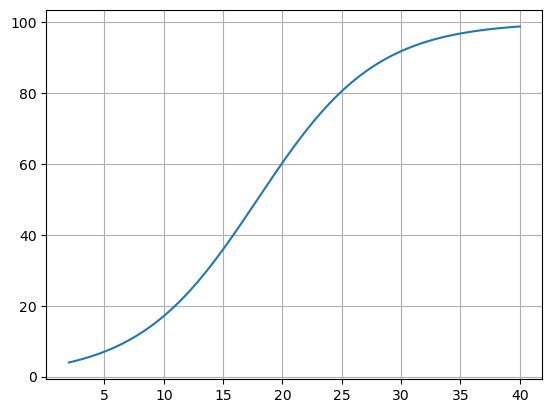

In [7]:
import matplotlib.pyplot as plt 
import numpy as numpy

x0 = 2           # Sett startverdi for x
y0 = 4           # Sett startverdi for y
xs = 40          # Setter sluttverdi for x
dx = 10**-6      # Sett steglengde

# Oppretter lister til å lagre x- og y-verdier
xliste = [x0]
yliste = [y0]

# Oppretter variabler for x og y som kan oppdateres i løkka
x = x0       
y = y0

# Definerer formen på den deriverte som kan avhenge av både x og y
def df(x, y):
    return 0.2*y*(1-y/100)

while x < xs:
    y = y + df(x, y)*dx       # Eulers metode for neste y-verdi
    x = x + dx                # Øker x med en steglengde
    yliste.append(y)          # Legger til y-verdien i lista
    xliste.append(x)          # Legger til x-verdien i lista

plt.plot(xliste, yliste)
plt.grid()
plt.show()

## Eksempel fra fysikk
De som tar fysikk har lært at akselerasjonen er en funksjon som er gitt som den deriverte av farten $a(t)=v'(t)$. Ved hjelp av sammenhenger med krefter kan vi ofte finne uttrykk for den deriverte. La oss for eksempel si at vi ser på en ball som slippes fra en gitt høyde. Det er et fall med luftmotstand. Det kan da vises at akselerasjonen som en funksjon av farten er gitt ved $a(v)=\frac{k}{m}\cdot v^2 -g$, der $v$ er farten, $g=9.81$ m/s$^2$ er tyngdeakselerasjonen, $k$ er et tall som har med luftmotstand å gjøre og $m$ er massen til personen. Siden $a(t)=v'(t)$ vil vi her få differensiallikningen

$$v'(t)=\frac{k}{m}\cdot v^2-g$$

For de som er interessert i fysikken bak gis forklaring i eksempelet.

```{admonition} Fysikkforklaring
:class: eksempel
Kreftene som virker på ballen er tyngdekraften $G=mg$ og luftmotstanden $L=kv^2$. Dersom vi velger positiv retning oppover vil vi fra Newtons 2. lov få:

$$\Sigma F=L-G = kv^2-mg=ma$$

Det kan brukes til å finne en funksjon for akselerasjonen uttrykt ved farten:

$$a(v)=v'(t)=\frac{k}{m}\cdot v^2-g$$
```

I løsningen under setter vi $k=0.25$ kg/m og $m=70$ kg. Vi setter starthøyden til 100 meter.

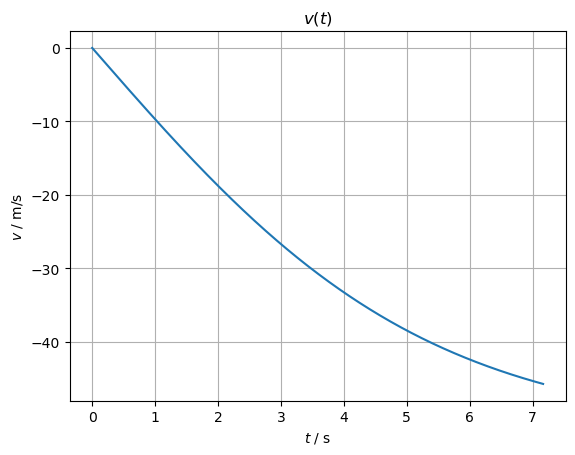

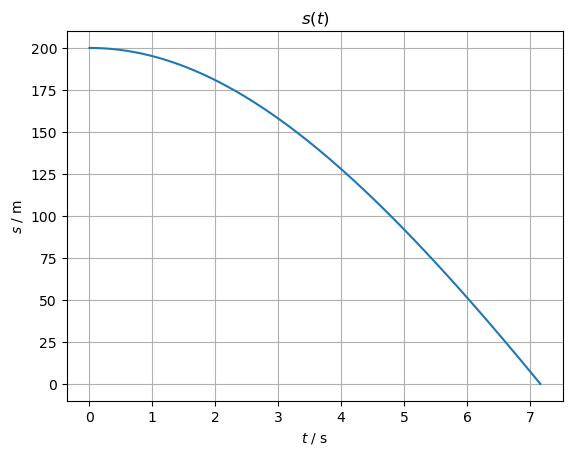

Fallskjermhopperen treffer bakken etter 7.2 sekunder.


In [19]:
import matplotlib.pyplot as plt

# Konstanter
g = 9.81
k = 0.25
m = 70

# Startverdier
s = 200
v = 0
t = 0

# Verdier og lister brukt til simulering
dt = 1E-3
s_liste = [s]
v_liste = [v]
t_liste = [t]

# Funksjon for akselerasjonen (v'(t))
def a(v):
    return k/m * v**2 - g

# Løkke som beregner og lagrer verdier for fart, posisjon og tid
while s > 0:
    v = v + a(v)*dt
    s = s + v*dt
    t = t + dt
    v_liste.append(v)
    s_liste.append(s)
    t_liste.append(t)

plt.plot(t_liste, v_liste)
plt.title("$v(t)$")
plt.xlabel("$t$ / s")
plt.ylabel("$v$ / m/s")
plt.grid()
plt.show()
plt.plot(t_liste, s_liste)
plt.title("$s(t)$")
plt.xlabel("$t$ / s")
plt.ylabel("$s$ / m")
plt.grid()
plt.show()

# Skriver ut den siste verdien i lista over t-verdier med en desimal.
print("Ballen treffer bakken etter", round(t_liste[-1],1), "sekunder.")


## Eksempel fra biologi
Det blir tatt en bakterieprøve fra halsen til en pasient.